In [1]:
import pandas as pd
file_path = "/content/drive/MyDrive/Chennai_1990_2022_Madras.csv"
try:
    weather_data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"File not found at {file_path}. Please check the path.")
    exit()
print("First few rows of the dataset:")
print(weather_data.head())
print("\nDataset Information:")
print(weather_data.info())
print("\nStatistical Summary:")
print(weather_data.describe())
missing_data = weather_data.isnull().sum()
print("\nMissing data in each column:")
print(missing_data)
cleaned_data = weather_data.dropna()
print(f"\nAfter dropping missing values, dataset has {len(cleaned_data)} rows.")
cleaned_data = cleaned_data[cleaned_data['tmax'] >= cleaned_data['tmin']]
print("\nCleaned dataset:")
print(cleaned_data.head())
cleaned_data.to_csv("cleaned_weather_data.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_weather_data.csv'")


Dataset loaded successfully.
First few rows of the dataset:
         time  tavg  tmin  tmax  prcp
0  01-01-1990  25.2  22.8  28.4   0.5
1  02-01-1990  24.9  21.7  29.1   0.0
2  03-01-1990  25.6  21.4  29.8   0.0
3  04-01-1990  25.7   NaN  28.7   0.0
4  05-01-1990  25.5  20.7  28.4   0.0

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11894 non-null  object 
 1   tavg    11867 non-null  float64
 2   tmin    8810 non-null   float64
 3   tmax    10875 non-null  float64
 4   prcp    7008 non-null   float64
dtypes: float64(4), object(1)
memory usage: 464.7+ KB
None

Statistical Summary:
               tavg         tmin          tmax         prcp
count  11867.000000  8810.000000  10875.000000  7008.000000
mean      28.490798    24.382770     33.908285     6.244378
std        2.605824     2.592423      3.380630    19.039751
mi

<Figure size 1200x600 with 0 Axes>

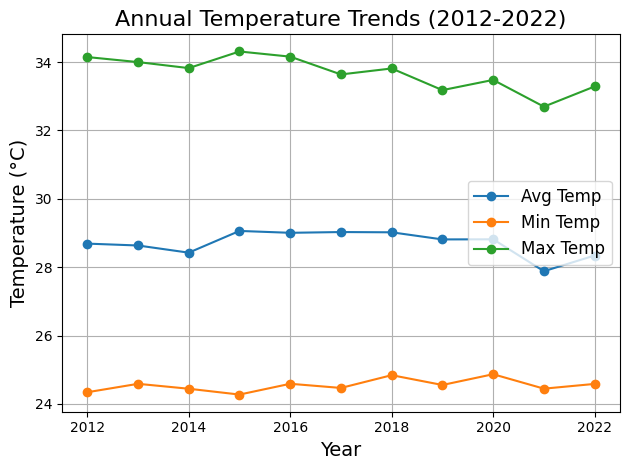

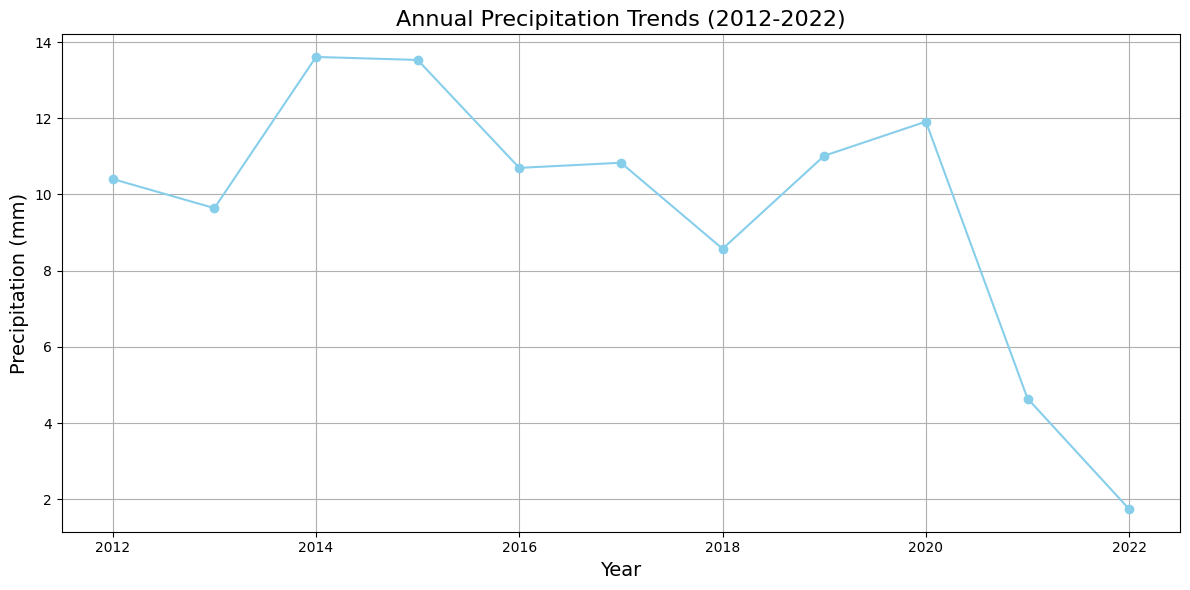

<Figure size 1200x600 with 0 Axes>

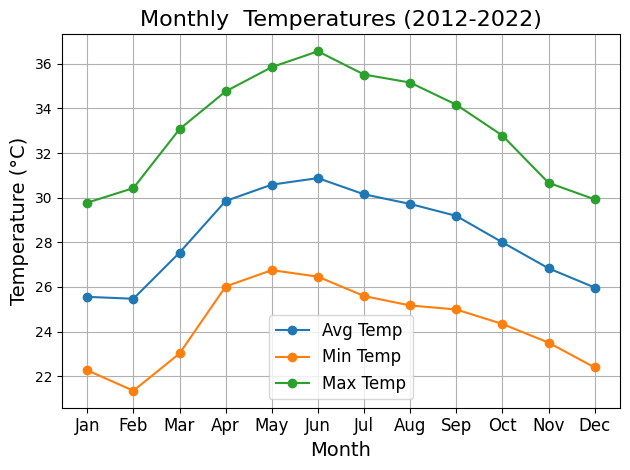

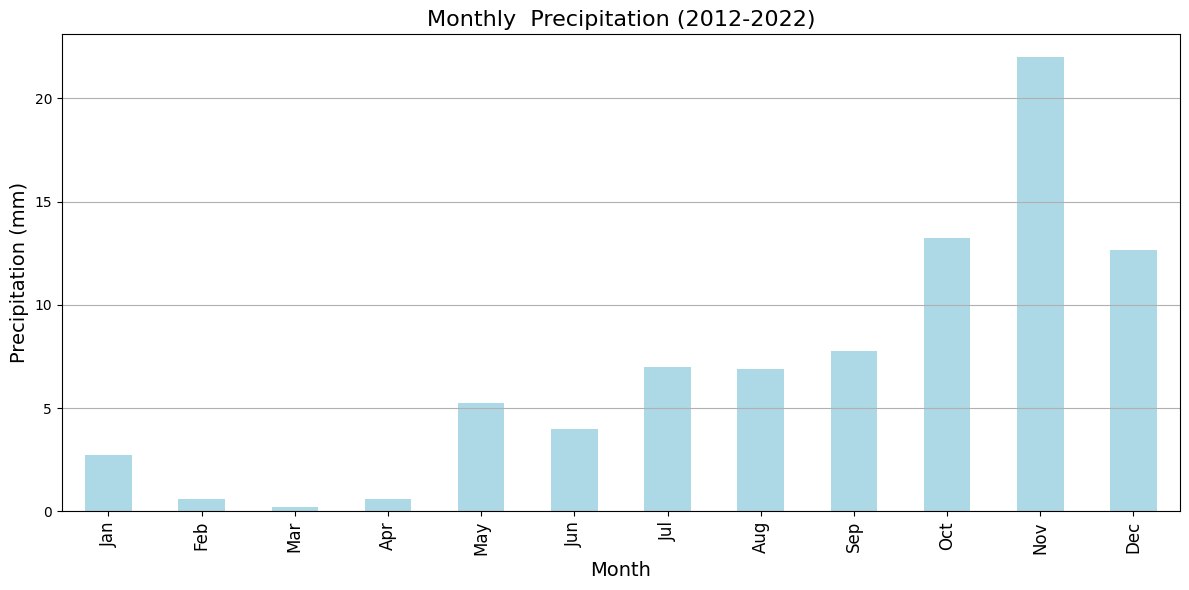

Extreme Events Detected (2012-2022):
           time  tavg  tmin  tmax  prcp
3394 2012-06-29  30.8  25.4  38.0  42.9
3398 2012-07-12  29.5  23.1  37.2  24.9
3399 2012-07-14  28.7  23.2  37.9  29.0
3402 2012-07-18  28.7  22.8  35.5  18.0
3415 2012-08-14  28.1  23.0  36.6  50.0
...         ...   ...   ...   ...   ...
4667 2021-11-28  24.5  23.4  28.4  36.6
4700 2021-12-31  23.7  21.9  29.2  18.5
4901 2022-07-21  28.4  24.5  32.8  21.1
4902 2022-07-22  27.8  24.6  32.2  22.1
4903 2022-07-23  27.4  24.7  32.6  18.6

[209 rows x 5 columns]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/cleaned_weather_data.csv')
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y', errors='coerce')
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['month_name'] = df['time'].dt.strftime('%B')
df_filtered = df[(df['year'] >= 2012) & (df['year'] <= 2022)]
annual_avg = df_filtered.groupby('year')[['tavg', 'tmin', 'tmax', 'prcp']].mean()

# Plot annual temperature trends
plt.figure(figsize=(12, 6))
annual_avg[['tavg', 'tmin', 'tmax']].plot(marker='o')
plt.title('Annual Temperature Trends (2012-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.legend(['Avg Temp', 'Min Temp', 'Max Temp'], fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

# Plot annual precipitation trend
plt.figure(figsize=(12, 6))
annual_avg['prcp'].plot(marker='o', color='skyblue')
plt.title('Annual Precipitation Trends (2012-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

monthly_avg = df_filtered.groupby('month')[['tavg', 'tmin', 'tmax', 'prcp']].mean()

# Plot monthly temperature patterns
plt.figure(figsize=(12, 6))
monthly_avg[['tavg', 'tmin', 'tmax']].plot(kind='line', marker='o')
plt.title('Monthly  Temperatures (2012-2022)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.legend(['Avg Temp', 'Min Temp', 'Max Temp'], fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

# Plot monthly precipitation patterns
plt.figure(figsize=(12, 6))
monthly_avg['prcp'].plot(kind='bar', color='lightblue')
plt.title('Monthly  Precipitation (2012-2022)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Q1 = df_filtered[['tavg', 'tmin', 'tmax', 'prcp']].quantile(0.25)
Q3 = df_filtered[['tavg', 'tmin', 'tmax', 'prcp']].quantile(0.75)
IQR = Q3 - Q1


outliers = df_filtered[
    (df_filtered['tavg'] < (Q1['tavg'] - 1.5 * IQR['tavg'])) |
    (df_filtered['tavg'] > (Q3['tavg'] + 1.5 * IQR['tavg'])) |
    (df_filtered['prcp'] > (Q3['prcp'] + 1.5 * IQR['prcp']))
]
print("Extreme Events Detected (2012-2022):")
print(outliers[['time', 'tavg', 'tmin', 'tmax', 'prcp']])


Months with Unusual Temperature Spikes:
     year month_name  temp_spike   z_score
12   2013        May   13.000000  2.442265
34   2015       July   12.470000  2.109380
50   2017        May   12.900000  2.379456
73   2019       June   12.866667  2.358520
100  2021   November    5.310000 -2.387707


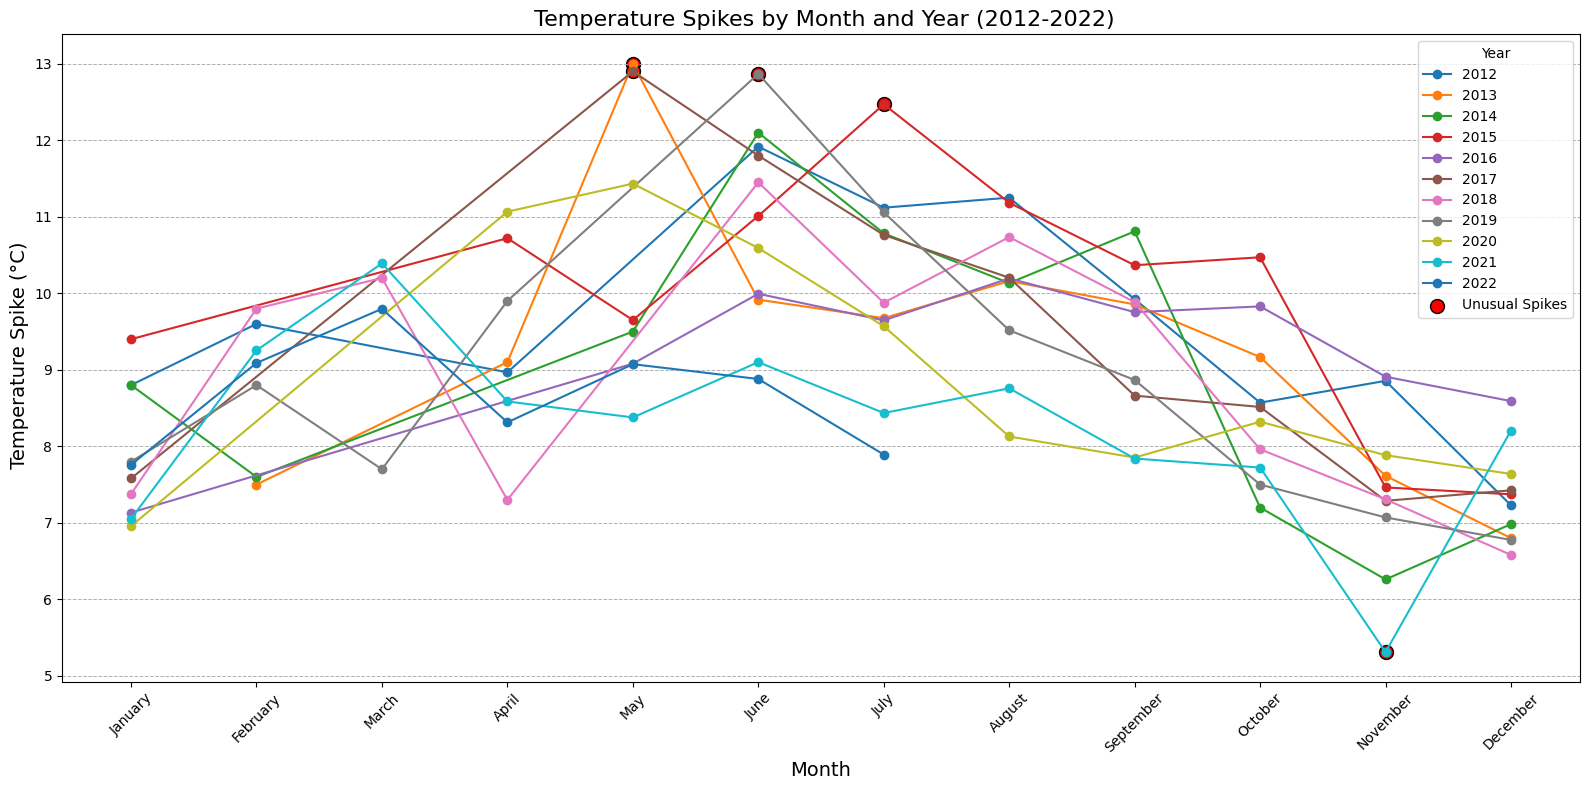

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/cleaned_weather_data.csv')
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y', errors='coerce')
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

last_decade_data = df[(df['year'] >= 2012) & (df['year'] <= 2022)].copy()
last_decade_data['temp_spike'] = last_decade_data['tmax'] - last_decade_data['tmin']
monthly_yearly_spikes = last_decade_data.groupby(['year', 'month'])['temp_spike'].mean().reset_index()
monthly_yearly_spikes['z_score'] = (
    (monthly_yearly_spikes['temp_spike'] - monthly_yearly_spikes['temp_spike'].mean()) /
    monthly_yearly_spikes['temp_spike'].std()
)
z_score_threshold = 2
monthly_yearly_spikes['is_unusual'] = monthly_yearly_spikes['z_score'].abs() > z_score_threshold
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
             6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October',
             11: 'November', 12: 'December'}

monthly_yearly_spikes['month_name'] = monthly_yearly_spikes['month'].map(month_map)

unusual_spikes = monthly_yearly_spikes[monthly_yearly_spikes['is_unusual']]
print("Months with Unusual Temperature Spikes:")
print(unusual_spikes[['year', 'month_name', 'temp_spike', 'z_score']])

# Visualizing the average temperature spikes in a line graph
plt.figure(figsize=(16, 8))

for year in monthly_yearly_spikes['year'].unique():
    data_year = monthly_yearly_spikes[monthly_yearly_spikes['year'] == year]
    plt.plot(data_year['month'], data_year['temp_spike'], marker='o', label=year)

plt.scatter(unusual_spikes['month'], unusual_spikes['temp_spike'], color='red', s=100, label='Unusual Spikes', edgecolor='black')
plt.title(' Temperature Spikes by Month and Year (2012-2022)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel(' Temperature Spike (°C)', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=list(month_map.values()), rotation=45)
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


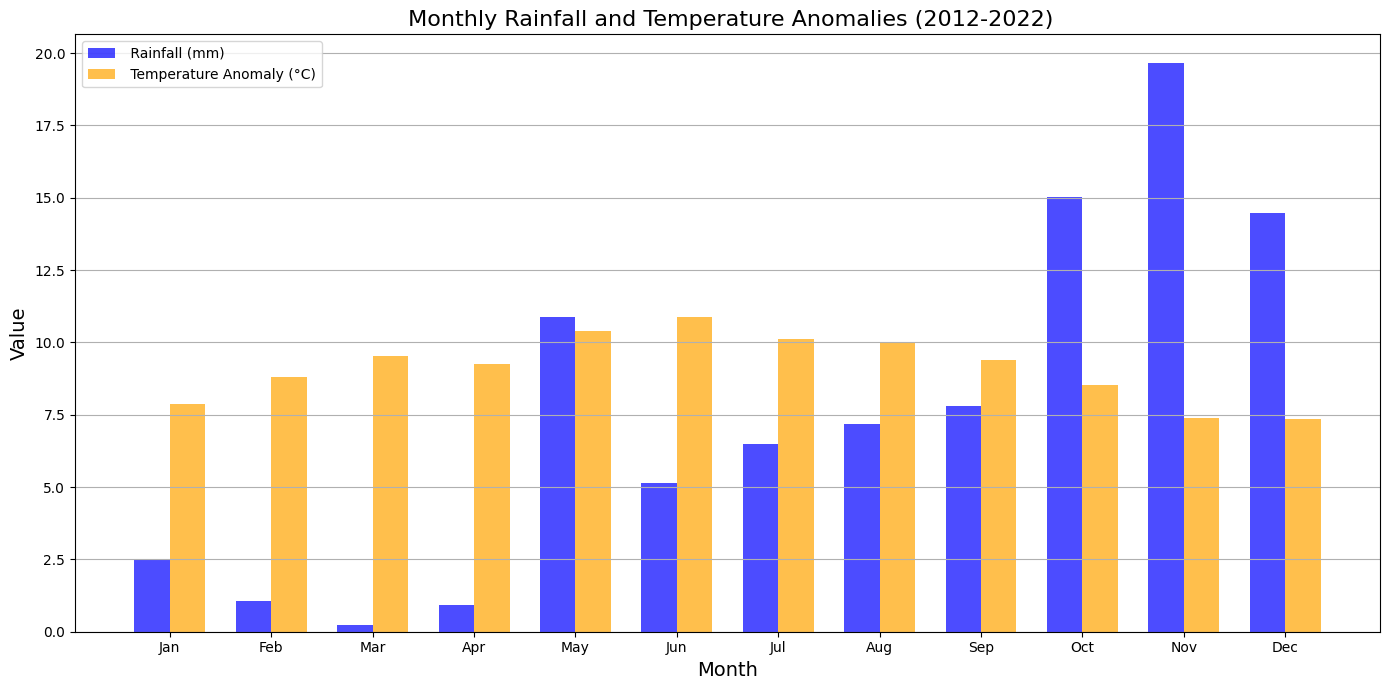

The correlation coefficient between  Rainfall and  Temperature anomalies is: -0.43


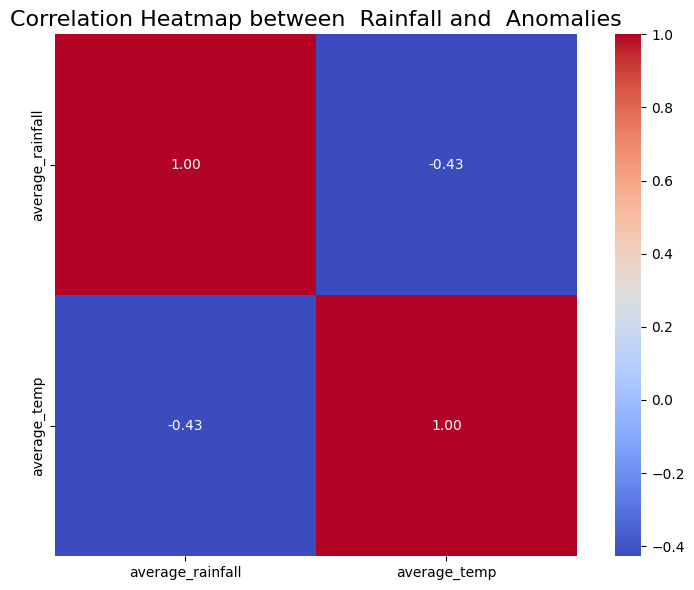

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/cleaned_weather_data.csv')
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y', errors='coerce')
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

last_decade_data = df[(df['year'] >= 2012) & (df['year'] <= 2022)].copy()
last_decade_data['temp_spike'] = last_decade_data['tmax'] - last_decade_data['tmin']
monthly_rainfall = last_decade_data.groupby(['year', 'month'])['prcp'].mean().reset_index()
monthly_rainfall.rename(columns={'prcp': 'average_rainfall'}, inplace=True)

monthly_temp = last_decade_data.groupby(['year', 'month'])['temp_spike'].mean().reset_index()
monthly_temp.rename(columns={'temp_spike': 'average_temp'}, inplace=True)
combined_data = monthly_rainfall.merge(monthly_temp, on=['year', 'month'])
average_monthly_data = combined_data.groupby('month')[['average_rainfall', 'average_temp']].mean().reset_index()

# Bar plot for average temperature anomalies
plt.figure(figsize=(14, 7))
bar_width = 0.35
x = range(len(average_monthly_data['month']))
plt.bar(x, average_monthly_data['average_rainfall'], width=bar_width, label=' Rainfall (mm)', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in x], average_monthly_data['average_temp'], width=bar_width, label=' Temperature Anomaly (°C)', color='orange', alpha=0.7)
plt.title(' Monthly Rainfall and Temperature Anomalies (2012-2022)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks([i + bar_width / 2 for i in x], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

correlation_coefficient = average_monthly_data[['average_rainfall', 'average_temp']].corr().iloc[0, 1]
print(f"The correlation coefficient between  Rainfall and  Temperature anomalies is: {correlation_coefficient:.2f}")

# Displaying the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(average_monthly_data[['average_rainfall', 'average_temp']].corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap between  Rainfall and  Anomalies', fontsize=16)
plt.tight_layout()
plt.show()


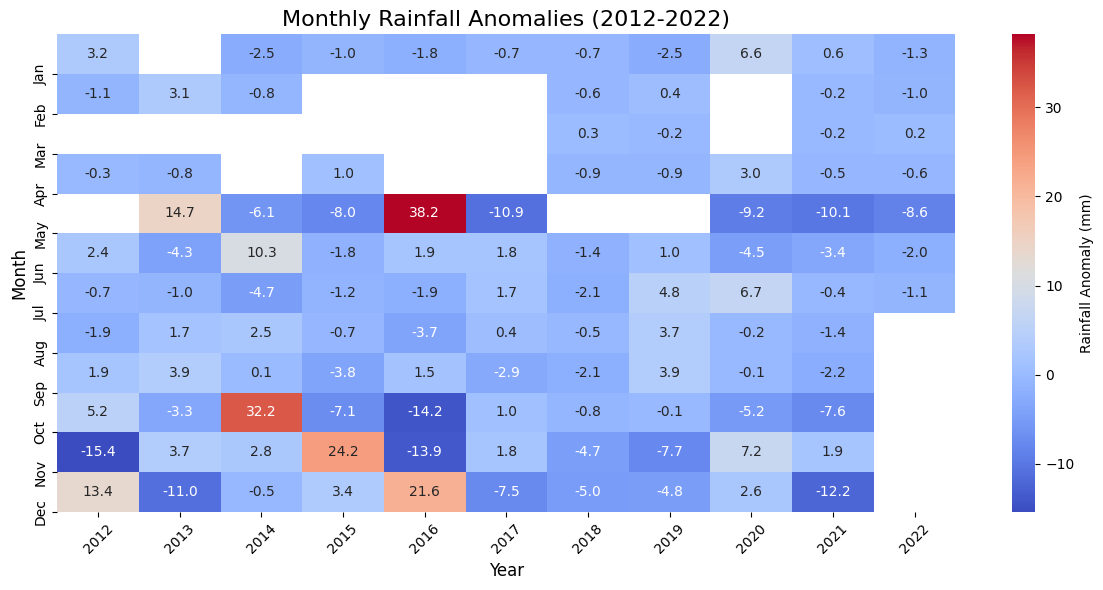

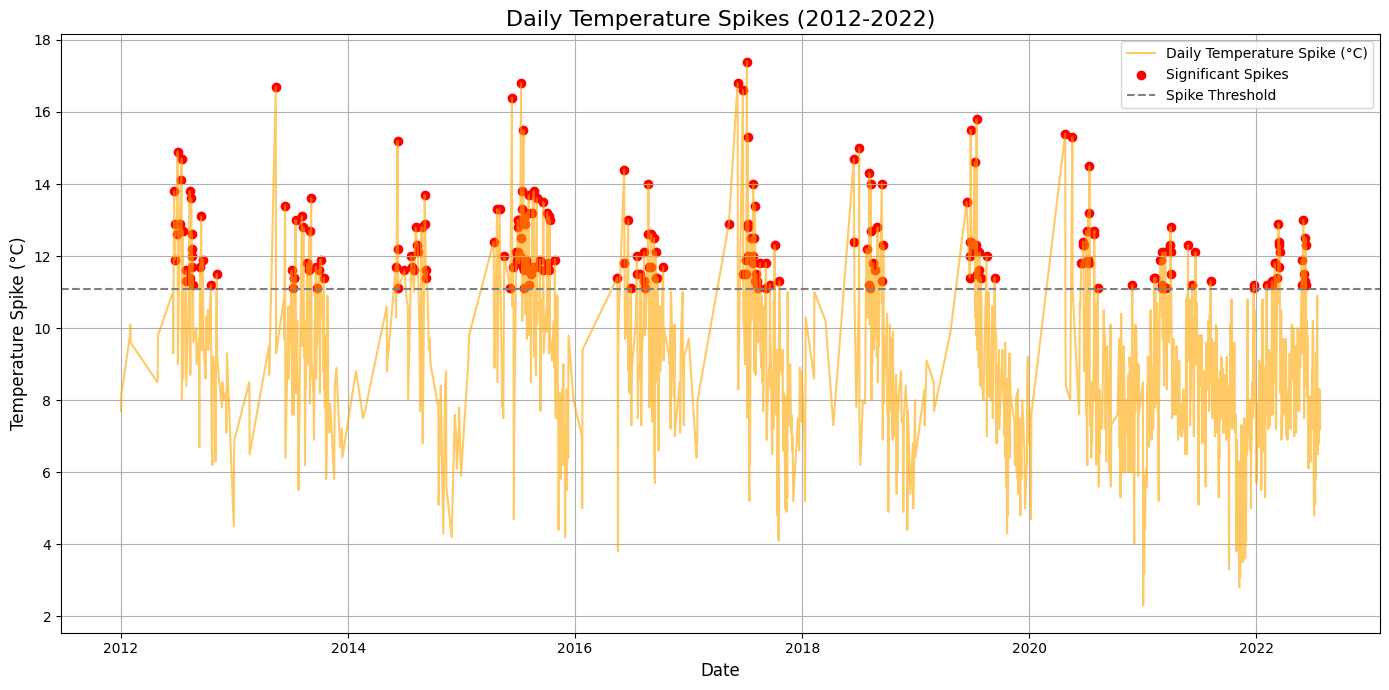

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/cleaned_weather_data.csv')

df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y', errors='coerce')
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

last_decade_data = df[(df['year'] >= 2012) & (df['year'] <= 2022)].copy()
last_decade_data['temp_spike'] = last_decade_data['tmax'] - last_decade_data['tmin']

monthly_rainfall = last_decade_data.groupby(['year', 'month'])['prcp'].mean().reset_index()
average_monthly_rainfall = monthly_rainfall.groupby('month')['prcp'].mean().reset_index()
average_monthly_rainfall.rename(columns={'prcp': 'avg_rainfall'}, inplace=True)


monthly_rainfall = monthly_rainfall.merge(average_monthly_rainfall, on='month')
monthly_rainfall['rainfall_anomaly'] = monthly_rainfall['prcp'] - monthly_rainfall['avg_rainfall']

monthly_temp = last_decade_data.groupby(['year', 'month'])['temp_spike'].mean().reset_index()
average_monthly_temp = monthly_temp.groupby('month')['temp_spike'].mean().reset_index()
average_monthly_temp.rename(columns={'temp_spike': 'avg_temp'}, inplace=True)

monthly_temp = monthly_temp.merge(average_monthly_temp, on='month')
monthly_temp['temp_anomaly'] = monthly_temp['temp_spike'] - monthly_temp['avg_temp']
correlation_data = monthly_rainfall.merge(monthly_temp[['year', 'month', 'temp_anomaly']], on=['year', 'month'])
heatmap_data = correlation_data.pivot_table(index='month', columns='year', values='rainfall_anomaly')

# CreatING heatmap for rainfall anomalies
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Rainfall Anomaly (mm)'})
plt.title('Monthly Rainfall Anomalies (2012-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# Creatinga line graph to highlight temperature spikes
plt.figure(figsize=(14, 7))
plt.plot(last_decade_data['time'], last_decade_data['temp_spike'], label='Daily Temperature Spike (°C)', color='orange', alpha=0.6)
spike_threshold = last_decade_data['temp_spike'].mean() + last_decade_data['temp_spike'].std()
spikes = last_decade_data[last_decade_data['temp_spike'] > spike_threshold]
plt.scatter(spikes['time'], spikes['temp_spike'], color='red', label='Significant Spikes', marker='o')
plt.title('Daily Temperature Spikes (2012-2022)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature Spike (°C)', fontsize=12)
plt.axhline(y=spike_threshold, color='gray', linestyle='--', label='Spike Threshold')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [6]:
import unittest
import pandas as pd

def load_data(filepath):
    return pd.read_csv(filepath)

def calculate_monthly_anomalies(df):
    if 'month' not in df.columns:
        df['month'] = pd.to_datetime(df['time']).dt.month

    long_term_avg = df.groupby('month').mean(numeric_only=True).reset_index()

    df = pd.merge(df, long_term_avg, on='month', suffixes=('', '_long_term'))

    df['tavg_anomaly'] = df['tavg'] - df['tavg_long_term']
    df['prcp_anomaly'] = df['prcp'] - df['prcp_long_term']

    return df

class TestWeatherAnalysis(unittest.TestCase):

    def setUp(self):

        self.df = pd.DataFrame({
            'time': ['01-01-2012', '02-01-2012', '03-01-2012', '04-01-2012', '05-01-2012'],
            'tavg': [25.0, 28.0, 22.0, 30.0, 26.0],
            'tmin': [20.0, 23.0, 19.0, 25.0, 21.0],
            'tmax': [30.0, 33.0, 27.0, 35.0, 32.0],
            'prcp': [0.0, 5.0, 0.0, 10.0, 0.0],
        })
        self.df['tavg'] = pd.to_numeric(self.df['tavg'])
        self.df['tmin'] = pd.to_numeric(self.df['tmin'])
        self.df['tmax'] = pd.to_numeric(self.df['tmax'])
        self.df['prcp'] = pd.to_numeric(self.df['prcp'])
        self.df['month'] = pd.to_datetime(self.df['time']).dt.month

    def test_load_data(self):
        pass

    def test_calculate_monthly_anomalies(self):
        anomalies = calculate_monthly_anomalies(self.df)

        self.assertIn('tavg_anomaly', anomalies.columns)
        self.assertIn('prcp_anomaly', anomalies.columns)
        self.assertFalse(anomalies['tavg_anomaly'].isna().any(), "tavg_anomaly contains NaN values")
        self.assertFalse(anomalies['prcp_anomaly'].isna().any(), "prcp_anomaly contains NaN values")


        first_row_avg = anomalies['tavg_long_term'].iloc[0]
        expected_tavg_anomaly = anomalies['tavg'].iloc[0] - first_row_avg
        self.assertAlmostEqual(anomalies['tavg_anomaly'].iloc[0], expected_tavg_anomaly, places=1)

        first_row_prcp_avg = anomalies['prcp_long_term'].iloc[0]
        expected_prcp_anomaly = anomalies['prcp'].iloc[0] - first_row_prcp_avg
        self.assertAlmostEqual(anomalies['prcp_anomaly'].iloc[0], expected_prcp_anomaly, places=1)

def run_tests():
    suite = unittest.TestLoader().loadTestsFromTestCase(TestWeatherAnalysis)
    unittest.TextTestRunner(verbosity=2).run(suite)
run_tests()


test_calculate_monthly_anomalies (__main__.TestWeatherAnalysis) ... ok
test_load_data (__main__.TestWeatherAnalysis) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.031s

OK
